In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
train_data = fetch_20newsgroups(subset='train')
train_df = pd.DataFrame({
    'Data': train_data.data,
    'Group': train_data.target
})

test_data = fetch_20newsgroups(subset='test')
test_df = pd.DataFrame({
    'Data': test_data.data,
    'Group': test_data.target
})

# Taking a sample of 100 articles for each group for train
train_df = train_df.groupby('Group', group_keys=False).apply(pd.DataFrame.sample, n=50)

# Taking a sample of 50 articles for each group for train
test_df = test_df.groupby('Group', group_keys=False).apply(pd.DataFrame.sample, n=25)

# Random shuffling dataframe
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

# Vectorizing the articles
vectorizer = TfidfVectorizer()
vectors_train = vectorizer.fit_transform(train_df.Data)
vectors_test = vectorizer.transform(test_df.Data)
n = vectors_train.shape[1]

vec_train = vectors_train.toarray()
vec_test = vectors_test.toarray()

vec_train = vec_train.tolist()
X_train = pd.DataFrame(vec_train, columns=np.arange(0,n,1))
y_train = train_df['Group']

vec_test = vec_test.tolist()
X_test = pd.DataFrame(vec_test, columns=np.arange(0,n,1))
y_test = test_df['Group']

In [4]:
lasso_scores = {}
for a in np.linspace(0.1,1,10):
    l = Lasso(alpha=a)
    kf = KFold(n_splits=5)
    scores = cross_val_score(l, X_train, y_train, cv=kf, scoring='r2')
    lasso_scores[a] = round(1-scores.mean(),4)

In [5]:
min_alpha = min(lasso_scores, key=lasso_scores.get)
print('alpha giving minimum error:', min_alpha)

alpha giving minimum error: 0.1


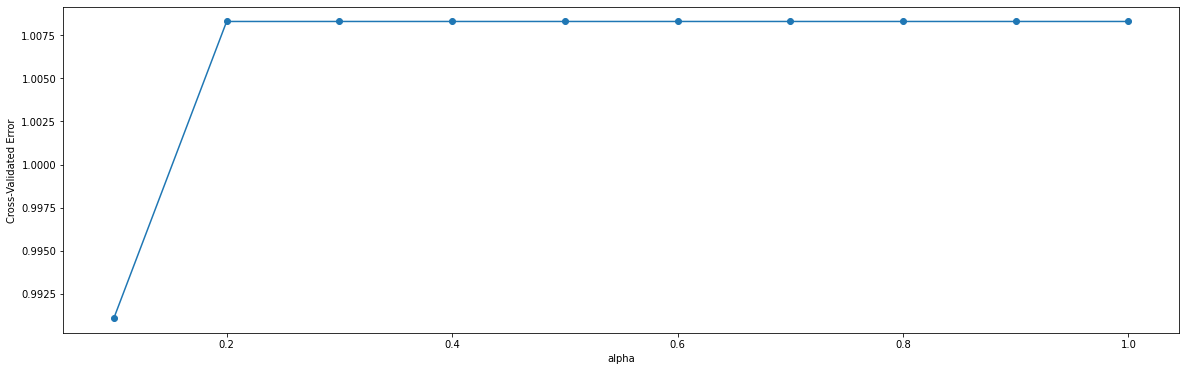

In [6]:
d_keys = list(lasso_scores.keys())
d_values = list(lasso_scores.values())
plt.figure(figsize = (20,6))
plt.plot(d_keys, d_values, marker='o')
plt.xlabel('alpha')
plt.ylabel('Cross-Validated Error')
plt.show()

In [7]:
lasso = Lasso(alpha=min_alpha)

In [8]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [11]:
coef_df = pd.DataFrame({'Coefficient':abs(lasso.coef_[0:-1]), 
                        'Column':X_train.columns[0:-1]}).sort_values(
                            by='Coefficient', ascending = False)
display(coef_df)

,Coefficient,Column
27399,2.844299,27399
0,0.000000,0
20652,0.000000,20652
20651,0.000000,20651
20650,0.000000,20650
...,...,...
10318,0.000000,10318
10317,0.000000,10317
10316,0.000000,10316
10315,0.000000,10315


In [13]:
cols = coef_df.Column[:200]